In [1]:
import numpy as np
import pandas as pd

In [2]:
reldir = '../datasets/'

In [3]:
df = pd.read_pickle(reldir + 'msd_tastes_merged.csv', compression='zip')

In [4]:
df_msd = pd.read_pickle(reldir + 'msd.csv', compression='zip')

## Suggestions for plain numeric data:
- For year, bin by decade (equal-width). For years that are recorded as 0, we can bin them in some 'Year unknown' bin
- Discretize key, mode, tempo (bin with equal-width), time signature
- Drop all columns for which std is 0
- Drop fade-in, fade-out
- Drop latitude & longitude because many missing values and we may be able to work with `artist_location` instead

## Suggestions for non-numeric data and numeric data stored in arrays:
- Drop analysis (beside id) : it's pure audio data and would require some audio processing know-how
- Drop songs_genre : empty
- Drop artist_terms_freq, artist_terms_weight : might be too hard to figure out how to work with these
- Consider dropping mbtags & mbtags_count


- Consider some encoding methods for artist_terms, artist_location
- Explore ways to work with similar_artists

## Missing values

In [93]:
df_nan = pd.isnull(df).sum().where(lambda x : x > 0).dropna()

In [94]:
df_nan

metadata_songs_artist_latitude     489715.0
metadata_songs_artist_longitude    489715.0
metadata_songs_song_hotttnesss      90514.0
dtype: float64

In [95]:
df_msd_nan = pd.isnull(df_msd).sum().where(lambda x : x > 0).dropna()
df_msd_nan

metadata_songs_artist_familiarity       4.0
metadata_songs_artist_latitude       6258.0
metadata_songs_artist_longitude      6258.0
metadata_songs_song_hotttnesss       4352.0
dtype: float64

How did artist familiarity get values?

For each user in the user dataset, we appended song data for each song the user played. Multiple users played the same songs, so we appended the same song data for each user that played a given song. This is the reason why the number of missing values increased. This is something interesting to consider when exploring other data. However, the percentage of missing values should probably still be the same.

In [96]:
# split into numerical and object
df_num = df_msd.select_dtypes(exclude='object')
df_obj = df_msd.select_dtypes(include='object')

# df_num_anal = df_num[[col for col in df_num if col.startswith('analysis_')]]
# df_num_meta = df_num[[col for col in df_num if col.startswith('metadata_')]]
# df_num_mb = df_num[[col for col in df_num if col.startswith('musicbrainz_')]]

# df_obj_anal = df_obj[[col for col in df_object if col.startswith('analysis_')]]
# df_obj_meta = df_obj[[col for col in df_object if col.startswith('metadata_')]]
# df_obj_mb = df_obj[[col for col in df_object if col.startswith('musicbrainz_')]]

# Numeric data exploration

In [97]:
# find numerical features with std of 0
num_feat_std0 = list(df_num.describe().loc['std'].where(lambda x : x <= 0).dropna().index)
df_num.describe()[num_feat_std0]

,analysis_songs_analysis_sample_rate,analysis_songs_danceability,analysis_songs_energy,analysis_songs_idx_bars_confidence,analysis_songs_idx_bars_start,analysis_songs_idx_beats_confidence,analysis_songs_idx_beats_start,analysis_songs_idx_sections_confidence,analysis_songs_idx_sections_start,analysis_songs_idx_segments_confidence,...,analysis_songs_idx_segments_loudness_max_time,analysis_songs_idx_segments_loudness_start,analysis_songs_idx_segments_pitches,analysis_songs_idx_segments_start,analysis_songs_idx_segments_timbre,analysis_songs_idx_tatums_confidence,analysis_songs_idx_tatums_start,metadata_songs_idx_artist_terms,metadata_songs_idx_similar_artists,musicbrainz_songs_idx_artist_mbtags
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,22050.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,22050.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,22050.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,22050.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,22050.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,22050.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We'll drop all numeric features that have a std of 0, since they will be meaningless to our model.

We'll also drop columns containing id's.

In [98]:
id_cols = [col for col in df_num if col.endswith('id')]
num_feat = [col for col in df_num if not num_feat_std0.__contains__(col)]
num_feat = [col for col in df_num if not id_cols.__contains__(col)]
df_num = df_num[num_feat]

In [99]:
df_num.describe()

,analysis_songs_analysis_sample_rate,analysis_songs_danceability,analysis_songs_duration,analysis_songs_end_of_fade_in,analysis_songs_energy,analysis_songs_idx_bars_confidence,analysis_songs_idx_bars_start,analysis_songs_idx_beats_confidence,analysis_songs_idx_beats_start,analysis_songs_idx_sections_confidence,...,analysis_songs_time_signature_confidence,metadata_songs_artist_familiarity,metadata_songs_artist_hotttnesss,metadata_songs_artist_latitude,metadata_songs_artist_longitude,metadata_songs_idx_artist_terms,metadata_songs_idx_similar_artists,metadata_songs_song_hotttnesss,musicbrainz_songs_idx_artist_mbtags,musicbrainz_songs_year
count,10000.0,10000.0,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,9996.000000,10000.000000,3742.000000,3742.000000,10000.0,10000.0,5648.000000,10000.0,10000.000000
mean,22050.0,0.0,238.507518,0.758616,0.0,0.0,0.0,0.0,0.0,0.0,...,0.509937,0.565456,0.385552,37.157357,-63.933358,0.0,0.0,0.342822,0.0,934.704600
std,0.0,0.0,114.137514,1.867952,0.0,0.0,0.0,0.0,0.0,0.0,...,0.373409,0.160161,0.143647,15.598494,50.508223,0.0,0.0,0.247220,0.0,996.650657
min,22050.0,0.0,1.044440,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-41.280540,-162.436500,0.0,0.0,0.000000,0.0,0.000000
25%,22050.0,0.0,176.032200,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.097750,0.467611,0.325266,33.748310,-93.291560,0.0,0.0,0.000000,0.0,0.000000
50%,22050.0,0.0,223.059140,0.199000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.551000,0.563666,0.380742,38.997920,-80.237420,0.0,0.0,0.360371,0.0,0.000000
75%,22050.0,0.0,276.375060,0.421000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.864000,0.668020,0.453858,43.648560,-9.401020,0.0,0.0,0.537504,0.0,2000.000000
max,22050.0,0.0,1819.767710,43.119000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.082503,69.651020,174.767140,0.0,0.0,1.000000,0.0,2010.000000


In [100]:
# get number of 0's in each column. Note: NaN's are not considered zeroes
10000 - df_num.astype(bool).sum(axis=0)

analysis_songs_analysis_sample_rate                  0
analysis_songs_danceability                      10000
analysis_songs_duration                              0
analysis_songs_end_of_fade_in                     3080
analysis_songs_energy                            10000
analysis_songs_idx_bars_confidence               10000
analysis_songs_idx_bars_start                    10000
analysis_songs_idx_beats_confidence              10000
analysis_songs_idx_beats_start                   10000
analysis_songs_idx_sections_confidence           10000
analysis_songs_idx_sections_start                10000
analysis_songs_idx_segments_confidence           10000
analysis_songs_idx_segments_loudness_max         10000
analysis_songs_idx_segments_loudness_max_time    10000
analysis_songs_idx_segments_loudness_start       10000
analysis_songs_idx_segments_pitches              10000
analysis_songs_idx_segments_start                10000
analysis_songs_idx_segments_timbre               10000
analysis_s

Features that should definitely have naturally occuring 0's:
- Key: values range from 0 to 11, each corresponding to a musical key
- Mode: values are either 0 or 1, representing major or minor
- Features ending in 'confidence': confidence values range from 0 to 1


Features that may have naturally occuring 0's, or 0's correspond to missing values:
- End of fade-in: 0 indicates there is no fade-in, or fade-in value is missing
- Features ending in 'hotttnesss': unsure but these may have a certain range

Features that 0's most likely correspond to missing values:
- Year: 0's correspond to missing values
- Tempo: songs cannot have 0 tempo (it's represented in BPM)
- Time signature: cannot be 0 (represented as beats per bar)

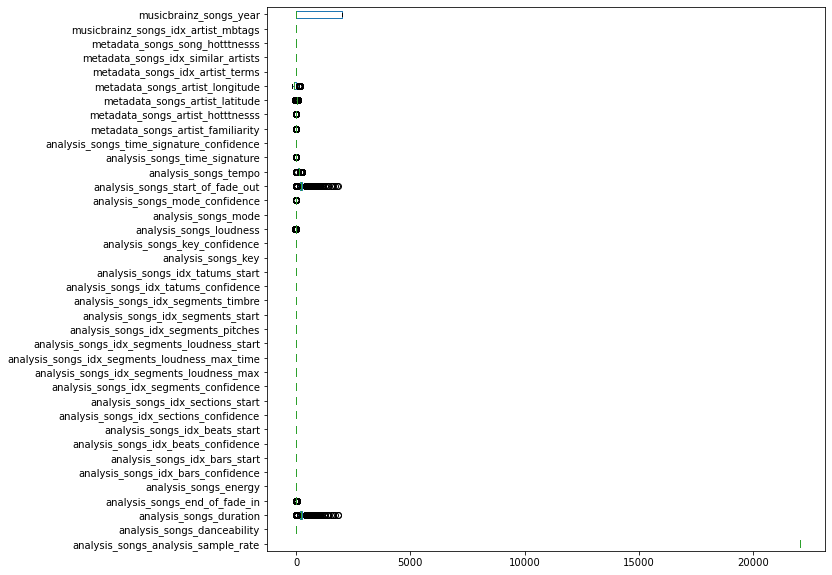

In [101]:
df_num.plot.box(vert=False, figsize=(10,10));

Take a look at `start_of_fade_out`. This is recorded in seconds. It doesn't seem reasonable that fade-outs could be that long. The distribution is similar to that of `songs_duration`.


Let's make some sense of it.


Are there any songs for which fade-out is recorded as the entire song?

In [102]:
df_num[df_num['analysis_songs_duration'] == df_num['analysis_songs_start_of_fade_out']].shape

(16, 38)

Are there any songs for which fade-out begins right after the fade-in?

In [103]:
df_num[df_num['analysis_songs_duration'] - df_num['analysis_songs_end_of_fade_in'] == df_num['analysis_songs_start_of_fade_out']].shape

(13, 38)

## Suggestions for plain numeric data:
- For year, bin by decade (equal-width). For years that are recorded as 0, we can bin them in some 'Year unknown' bin
- Discretize key, mode, tempo (bin with equal-width), time signature
- Drop all columns for which std is 0
- Drop fade-in, fade-out
- Drop latitude & longitude because many missing values and we may be able to work with `artist_location` instead

# 'Object' data exploration

We have two types of 'object' types: those storing strings and those storing arrays. These arrays could store numbers or strings.

In [104]:
df_obj_mb = df_obj[[col for col in df_obj if col.startswith('musicbrainz')]]
df_obj_mb.head()

,musicbrainz_artist_mbtags,musicbrainz_artist_mbtags_count
0,[],[]
1,[],[]
2,[],[]
3,[],[]
4,[],[]


In [105]:
mb_tags = df_obj_mb['musicbrainz_artist_mbtags'].to_list()
mb_tags_count = df_obj_mb['musicbrainz_artist_mbtags_count'].to_list()

In [106]:
# Getting a list of all unique tags

unique_tags = []
for array in mb_tags:
    for tag in array:
        if ( tag not in unique_tags ):
            unique_tags.append(tag)
            
#     if ( len(array) > 0 ):
#         if ( type(array[0]) != np.bytes_ ):
#             print(type(array[0]))

In [107]:
# How many songs have any tags?

songs_w_tags = 0
for array in mb_tags:
    if ( len(array) > 0 ):
        songs_w_tags += 1
songs_w_tags

3710

3710 songs have tags. Actually, these tags are for the artists. Artists with more songs in this dataset add to this number.

This isn't much. Also, the tags may be spelled differently on new data. Unsure about these.

In [108]:
df_obj_anal = df_obj[[col for col in df_obj if col.startswith('analysis')]]
df_obj_anal.head()

,analysis_bars_confidence,analysis_bars_start,analysis_beats_confidence,analysis_beats_start,analysis_sections_confidence,analysis_sections_start,analysis_segments_confidence,analysis_segments_loudness_max,analysis_segments_loudness_max_time,analysis_segments_loudness_start,analysis_segments_pitches,analysis_segments_start,analysis_segments_timbre,analysis_songs_audio_md5,analysis_songs_track_id,analysis_tatums_confidence,analysis_tatums_start
0,"[0.179, 0.373, 0.127, 0.015, 0.012, 0.119, 0.0...","[0.52458, 2.4444, 4.3658, 6.30006, 8.22086, 10...","[0.886, 0.725, 0.748, 0.721, 0.784, 0.417, 0.4...","[0.04257, 0.52458, 1.00659, 1.48632, 1.96605, ...","[1.0, 1.0, 0.508, 0.334, 0.113, 0.593]","[0.0, 7.74174, 40.30707, 80.4797, 89.656, 127....","[0.0, 0.732, 1.0, 0.556, 1.0, 0.584, 0.559, 1....","[-60.0, -52.849, -42.59, -41.542, -32.881, -34...","[0.0, 0.19543, 0.02958, 0.0238, 0.02788, 0.020...","[-60.0, -60.0, -55.39, -46.295, -48.97, -39.43...","[[0.726, 0.112, 0.02, 0.019, 0.01, 0.038, 0.03...","[0.0, 0.19188, 0.60499, 0.84939, 1.10018, 1.36...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",d8bafd4a65d1855aec08991c8b013dc1,TRARRZU128F4253CA2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.04257, 0.28357, 0.52458, 0.76558, 1.00659, ..."
1,"[0.716, 0.306, 0.015, 0.572, 0.529, 0.353, 0.2...","[8.69527, 12.01758, 14.81363, 20.09003, 22.693...","[0.773, 0.247, 0.402, 0.115, 0.092, 0.436, 0.5...","[0.59161, 1.33555, 2.07949, 2.82093, 3.56238, ...","[1.0, 0.502, 0.721, 0.552, 0.575, 0.704, 0.332...","[0.0, 7.08047, 39.03442, 89.26989, 114.94898, ...","[0.0, 1.0, 0.276, 0.54, 0.009, 0.53, 0.624, 0....","[-59.854, -31.966, -33.722, -34.887, -36.92, -...","[0.46727, 0.08541, 0.0262, 0.05198, 0.05883, 0...","[-60.0, -59.869, -37.121, -39.899, -38.511, -3...","[[0.943, 1.0, 0.91, 0.782, 0.726, 0.806, 0.314...","[0.0, 0.51379, 0.89138, 1.30912, 1.65297, 2.05...","[[0.008, 170.986, 9.126, -28.685, 57.183, -50....",55f60c97280172e9276723c06e531996,TRARRJL128F92DED0E,"[0.365, 0.321, 0.29, 0.264, 0.238, 0.217, 0.20...","[0.59161, 0.84042, 1.08799, 1.33555, 1.58436, ..."
2,"[0.014, 0.025, 0.049, 0.029, 0.11, 0.484, 0.35...","[1.95344, 6.35701, 10.70579, 15.07913, 19.4832...","[0.506, 0.467, 0.45, 0.682, 0.341, 0.406, 0.38...","[1.95344, 3.0622, 4.16548, 5.26467, 6.35701, 7...","[1.0, 0.163, 0.07, 0.06]","[0.0, 13.98322, 29.36585, 42.60077]","[0.121, 1.0, 1.0, 0.616, 0.742, 0.237, 0.775, ...","[-57.038, -34.87, -27.931, -27.929, -26.243, -...","[0.96943, 0.11297, 0.10248, 0.13633, 0.08612, ...","[-60.0, -57.069, -44.994, -35.805, -34.676, -3...","[[1.0, 0.926, 0.264, 0.384, 0.298, 0.261, 0.22...","[0.0, 0.97365, 1.34431, 1.81351, 2.19764, 2.44...","[[1.337, 145.247, -43.274, -47.807, 18.519, -4...",053fb50807248bef996e6c7a5fe93533,TRARRUZ128F9307C57,"[0.307, 0.305, 0.291, 0.284, 0.281, 0.28, 0.27...","[1.11537, 1.39701, 1.67864, 1.95344, 2.23097, ..."
3,"[0.095, 0.147, 0.157, 0.191, 0.115, 0.222, 0.2...","[0.39309, 2.75109, 5.13649, 7.52978, 9.95582, ...","[0.862, 0.509, 0.011, 0.39, 0.479, 0.422, 0.45...","[0.39309, 1.17222, 1.95902, 2.75109, 3.55236, ...","[1.0, 0.744, 0.36, 0.628, 0.147, 0.093]","[0.0, 8.33166, 37.94071, 63.53617, 82.18998, 9...","[0.0, 1.0, 0.345, 0.437, 0.047, 0.365, 0.482, ...","[-41.332, -7.537, -9.059, -9.55, -8.652, -9.24...","[0.0486, 0.04473, 0.01745, 0.02479, 0.09025, 0...","[-60.0, -41.859, -13.428, -14.469, -13.079, -1...","[[0.835, 0.639, 0.492, 0.399, 0.326, 0.697, 0....","[0.0, 0.07306, 0.36862, 0.64739, 0.79238, 1.04...","[[14.832, -56.33, 69.981, -43.028, 138.861, 58...",1637df8efe4d89507b6f4ef89a82cacf,TRARRWA128F42A0195,"[0.731, 0.628, 0.526, 0.359, 0.287, 0.246, 0.2...","[0.11929, 0.39309, 0.65603, 0.91083, 1.17222, ..."
4,"[0.32, 0.081, 0.567, 0.328, 0.112, 0.004, 0.09...","[0.99301, 2.99441, 4.96889, 6.9402, 8.92127, 1...","[0.382, 0.374, 0.464, 0.343, 0.553, 0.49, 0.63...","[0.49266, 0.99301, 1.49336, 1.99371, 2.49406, ...","[1.0, 0.171, 0.658, 0.609, 0.551, 0.591, 0.525...","[0.0, 8.42605

This is all pure audio data. The description on the website confirms this. I don't think this will be useful for us. The only thing we need to keep is `track_id`

In [109]:
# Drop all analysis but track_id
df_obj_anal = df_obj_anal.drop(['analysis_songs_track_id'], axis=1)
df_obj = df_obj[[col for col in df_obj if not df_obj_anal.__contains__(col)]]

In [110]:
df_obj.head()

,analysis_songs_track_id,metadata_artist_terms,metadata_artist_terms_freq,metadata_artist_terms_weight,metadata_similar_artists,metadata_songs_analyzer_version,metadata_songs_artist_id,metadata_songs_artist_location,metadata_songs_artist_mbid,metadata_songs_artist_name,metadata_songs_genre,metadata_songs_release,metadata_songs_song_id,metadata_songs_title,musicbrainz_artist_mbtags,musicbrainz_artist_mbtags_count
0,TRARRZU128F4253CA2,"[b'chanson', b'visual kei', b'hip hop', b'pop ...","[0.9106976156829982, 0.892165696549715, 1.0, 0...","[1.0, 0.9915376816967095, 0.9554596873428609, ...","[b'ARVEJ9M1187FB4DC44', b'ARYDHN21187FB466A8',...",,AREJXK41187B9A4ACC,France,c43bb0d6-94d7-410f-80fb-e5a243b18d23,Raphaël,,Je Sais Que La Terre Est Plate (Deluxe),SOGSMXL12A81C23D88,Je Sais Que La Terre Est Plate,[],[]
1,TRARRJL128F92DED0E,"[b'chanson', b'dance pop', b'pop rock', b'soft...","[1.0, 0.8729706020462483, 0.9823877698159625, ...","[1.0, 0.9211512994427619, 0.9124620665627354, ...","[b'ARAGSU61187B98C95C', b'ARO9XCZ1187B99C255',...",,AR2XRFQ1187FB417FE,,a69cd724-2f57-4ed0-bfed-ba20401eb84c,Julie Zenatti,,Comme Vous,SOMBCOW12AAF3B229F,On Efface,[],[]
2,TRARRUZ128F9307C57,"[b'early music', b'celtic', b'mediaeval', b'fo...","[1.0, 1.0, 0.6760874700254027, 0.8857812190979...","[1.0, 0.9394607822094231, 0.7622625756944362, ...","[b'ARVZRHW11F4C83CF5F', b'ARGCYMZ1187B9A6EA1',...",,ARODOO01187FB44F4A,,60bd8a1c-c093-4849-8f28-08101ca059b1,The Baltimore Consort,,Watkins Ale - Music of the English Renaissance,SOEYIHF12AB017B5F4,Howells Delight,[],[]
3,TRARRWA128F42A0195,"[b'post-hardcore', b'doomcore', b'metalcore', ...","[1.0, 0.8629106009512346, 0.956488673940283, 0...","[1.0, 0.9773041110378197, 0.9410540299876582, ...","[b'ARMJF6H1187B9A1798', b'ARYOWT31187B9AB7AC',...",,ARJGW911187FB586CA,,44b5b950-2ae2-403a-8c67-82d8fc72033d,I Hate Sally,,Don't Worry Lady,SODJYEC12A8C13D757,Martha Served,[],[]
4,TRARRPG12903CD1DE9,"[b'orchestra', b'musical theater', b'british',...","[0.9285514142959397, 0.8442371866725698, 1.0, ...","[1.0, 0.9397193781004368, 0.8971379811451067, ...","[b'ARFMQNW12454A47686', b'ARKWDUB124207801C0',...",,AR9HQ6Y1187FB3C2CB,,0e6524bd-6641-46a6-bce5-96f06c19aa46,Orlando Pops Orchestra,,Easy Listening: Cartoon Songs,SOGSOUE12A58A76443,Zip-A-Dee-Doo-Dah (Song of the South),[],[]


In [111]:
# Get all unique artist terms
unique_terms = []
for array in df_obj['metadata_artist_terms']:
    for term in array:
        if ( term not in unique_terms ):
            unique_terms.append(term)

`'metadata_songs_analyzer_version'` and `'metadata_songs_genre'` don't appear to have any values.

In [112]:
df_obj[df_obj['metadata_songs_analyzer_version'] != ''].shape

(0, 16)

In [113]:
len([genre for genre in df_obj['metadata_songs_genre'].to_list() if len(genre) > 0])

0

In [114]:
df_obj = df_obj.drop(['metadata_artist_terms_freq', 'metadata_artist_terms_weight', 'metadata_songs_analyzer_version', 'metadata_songs_genre'], axis=1)

What about locations? Can we do anything with these?

In [115]:
locations = list(df_obj[df_obj['metadata_songs_artist_location'] != '']['metadata_songs_artist_location'].unique())

In [125]:
locations_ny = [location for location in locations if 'NY' in location or 'New York' in location]
len(locations_ny)

63

## Suggestions for non-numeric data and numeric data stored in arrays:
- Drop analysis (beside id) : it's pure audio data and would require some audio processing know-how
- Drop songs_genre : empty
- Drop artist_terms_freq, artist_terms_weight : might be too hard to figure out how to work with these
- Consider dropping mbtags & mbtags_count


- Consider some encoding methods for artist_terms, artist_location
- Explore ways to work with similar_artists